In [1]:
!pwd

/Users/romain/OneDrive/Documents/__  Memorandum/_____encours/clients/2016 05 20 - Rissoan/2017 03 12 - IBM spark/formation_ibm


# Scikit Learn

## 1) Import de dataset

In [2]:
from sklearn import datasets

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

## 2) separer le jeu d'apprentissage du jeu de test

In [4]:
from sklearn.cross_validation import train_test_split


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## 3) Standardiser les valeurs

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

## 4) choisir un algo et le tester
### exemple : Support Vector Machine

In [9]:
from sklearn import svm
algorithme = svm.SVC(kernel='linear')

In [10]:
from sklearn import cross_validation
cross_validation.cross_val_score(svr, X, y, n_jobs=-1)

array([ 0.93521595,  0.95826377,  0.93791946])

## 5) aller au delà des paramètres par défaut avec un grid search

In [11]:
from sklearn import grid_search
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_

0.972568578554 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


## 5.1) affiner le grid search

In [12]:
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_

0.972568578554 SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [13]:
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.97672485453 SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.05, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [14]:
parameters = {  'C'       : [2.5, 3, 4]   ,
                'kernel'  : ['rbf', 'poly', 'sigmoid'],
                'gamma'   : [ 0.01, 0.05, 0.07],
                 "degree" : [1,3,5]}
grid = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.979218620116 SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=1, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [15]:
parameters = {  'C'       : [4, 5, 6, 7]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03, 0.05, 0.07],
                 "degree" : [1,2, 3]}
grid = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.969243557772 SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=1, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [16]:
parameters = {  'C'       : [7, 10, 15]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.02, 0.03, 0.04],
                 "degree" : [1,2]}
grid = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.972568578554 SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=1, gamma=0.02, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# 6) tester tous les algorithmes

In [21]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print dir(sklearn)
    for nom_module in dir(sklearn):    
        if verbose : print nom_module
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print " nom algorithme  = ", nom_fonction
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print e
        if verbose: print "="*30
    return algos

In [22]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print "\n===>",key
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print ",".join(algos_)


===> grid_search
GridSearchCV,RandomizedSearchCV

===> svm
LinearSVC,LinearSVR,NuSVC,NuSVR,OneClassSVM,SVC,SVR,so

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LogisticRegression,LogisticRegressionCV,MultiTaskElasticNet,MultiTaskElasticNetCV,MultiTaskLasso,MultiTaskLassoCV,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveClassifier,PassiveAggressiveRegressor,Perceptron,RANSACRegressor,RandomizedLasso,RandomizedLogisticRegression,Ridge,RidgeCV,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SGDRegressor,TheilSenRegressor

===> multiclass
LabelBinarizer,OneVsOneClassifier,OneVsRestClassifier,OutputCodeClassifier,_ConstantPredictor

===> feature_extraction
DictVectorizer,FeatureHasher

===> preprocessing
Binarizer,FunctionTransformer,Imputer,KernelCenterer,LabelBinarizer,LabelEncoder,MaxAbsScaler,MinMaxScaler,MultiLabelBinarizer,Normalizer,OneHotEncoder,PolynomialFe

In [23]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [24]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print name
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print performance
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print "Algo de classification"
        else                : print str(e)[:50]
    print "="*30
    

__init__() takes at least 3 arguments (1 given)
__init__() takes at least 3 arguments (1 given)
Linear Support Vector Cla
0.946127946128
Linear Support Vector Reg
0.542263489827
Nu-Support Vector Classif
0.936026936027
Nu Support Vector Regress
0.816450156685
Unsupervised Outlier Dete
'OneClassSVM' object has no attribute 'score'
C-Support Vector Classifi
0.976430976431
Epsilon-Support Vector Re
0.817645335207
'module' object is not callable
Bayesian ARD regression.
0.560393332861
Bayesian ridge regression
0.566843574451
Linear regression with co
0.167926167309
Elastic Net model with it
0.556010645114
Least Angle Regression mo
0.530413301444
Cross-validated Least Ang
0.509762663934
Linear Model trained with
0.0280123813713
Lasso linear model with i
0.552477993305
Lasso model fit with Leas
-0.00400083364741
Cross-validated Lasso, us
0.559005051955
Lasso model fit with Lars
0.565308955108
Ordinary least squar
0.570786145098
Logistic Regression (aka


/Users/romain/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.957912457912
Logistic Regression CV (a
0.959595959596
Multi-task ElasticNet mod
For mono-task outputs, use ElasticNet
Multi-task L1/L2 ElasticN
For mono-task outputs, use ElasticNetCV
Multi-task Lasso model tr
For mono-task outputs, use ElasticNet
Multi-task L1/L2 Lasso wi
For mono-task outputs, use LassoCV
Orthogonal Matching Pursu
0.403189604162
Cross-validated Orthogona
0.403189604162
Passive Aggressive Classi
0.951178451178
Passive Aggressive Regres
0.0739714272469
Perceptron

    Read more
0.915824915825
RANSAC (RANdom SAmple Con
-4.23500198867e+23
Randomized Lasso.

    Ra
'RandomizedLasso' object has no attribute 'score'
Randomized Logistic Regre
'RandomizedLogisticRegression' object has no attri
Linear least squares with
0.570704116944
Ridge regression with bui
0.569886846902
Classifier using Ridge re
0.925925925926
Ridge classifier with bui
0.925925925926
Linear classifiers (SVM,
0.941077441077
Linear model fitted by mi
0.378792111413
Theil-Sen Estimator
0.459998857786
Binar

/Users/romain/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 0 24 32 39 56] are constant.
  UserWarning)
/Users/romain/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [25]:
performances

{'Bayesian ARD regression.': [0.56039333286129089],
 'Bayesian ridge regression': [0.56684357445143885],
 'C-Support Vector Classifi': [0.97643097643097643],
 'Classifier using Ridge re': [0.92592592592592593],
 'Cross-validated Lasso, us': [0.55900505195472383],
 'Cross-validated Least Ang': [0.50976266393376402],
 'Cross-validated Orthogona': [0.40318960416170757],
 'Elastic Net model with it': [0.55601064511392995],
 'Epsilon-Support Vector Re': [0.81764533520729477],
 'Lasso linear model with i': [0.55247799330510938],
 'Lasso model fit with Lars': [0.56530895510802737],
 'Least Angle Regression mo': [0.53041330144397181],
 'Linear Model trained with': [0.02801238137125572],
 'Linear Support Vector Cla': [0.94612794612794615],
 'Linear Support Vector Reg': [0.54226348982724559],
 'Linear classifiers (SVM,': [0.94107744107744107],
 'Linear least squares with': [0.57070411694357781],
 'Linear model fitted by mi': [0.37879211141334035],
 'Linear regression with co': [0.167926167309017

# 7) Faire des graphiques de comparaisons

In [26]:
import pandas as pd

In [27]:
df = pd.DataFrame(performances).T

In [28]:
col_name = "performance"
df.columns = [col_name]

In [29]:
df = df.sort_values(col_name)

In [30]:
df

,performance
Linear Model trained with,0.028012
Passive Aggressive Regres,0.073971
Linear regression with co,0.167926
Linear model fitted by mi,0.378792
Orthogonal Matching Pursu,0.403190
Cross-validated Orthogona,0.403190
Theil-Sen Estimator,0.459999
Cross-validated Least Ang,0.509763
Least Angle Regression mo,0.530413
Linear Support Vector Reg,0.542263


In [31]:
liste_des_performances = df.performance.values
gains = [0]
for indice, performance in enumerate(liste_des_performances):
    if indice>0:
        previous_value = liste_des_performances[indice-1]
        current_value  = liste_des_performances[indice]
        gain = (current_value - previous_value) / previous_value
        gains.append(round(gain*100, 2))
df["gains"] = gains

In [32]:
df = df.drop("gains", axis=1)

In [33]:
df

,performance
Linear Model trained with,0.028012
Passive Aggressive Regres,0.073971
Linear regression with co,0.167926
Linear model fitted by mi,0.378792
Orthogonal Matching Pursu,0.403190
Cross-validated Orthogona,0.403190
Theil-Sen Estimator,0.459999
Cross-validated Least Ang,0.509763
Least Angle Regression mo,0.530413
Linear Support Vector Reg,0.542263


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

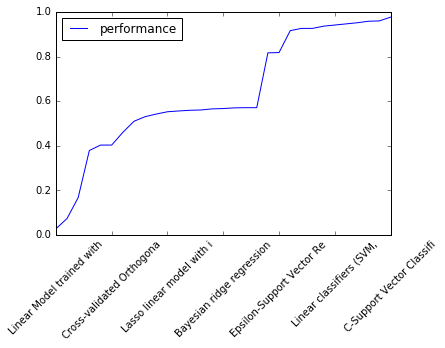

In [35]:
df = df.sort_values(col_name)
ax = df.plot(rot=45, x_compat=True)

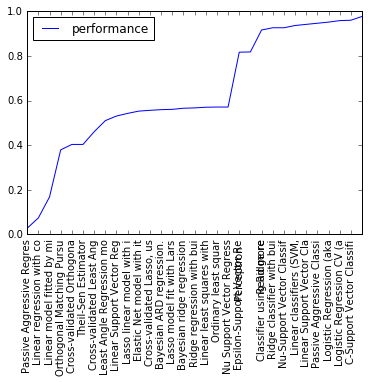

In [36]:
df = df.sort_values(col_name)
ax = df.plot(rot=90, x_compat=True)
ax.xaxis.set_ticklabels(df.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

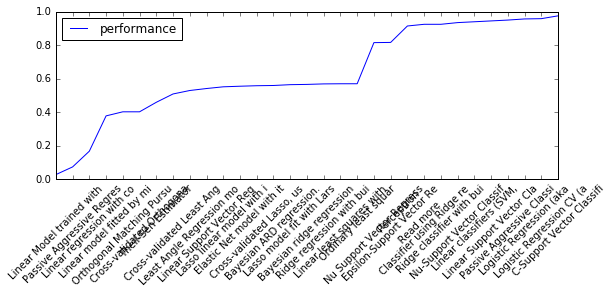

In [37]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(rot=45, ax=axes)


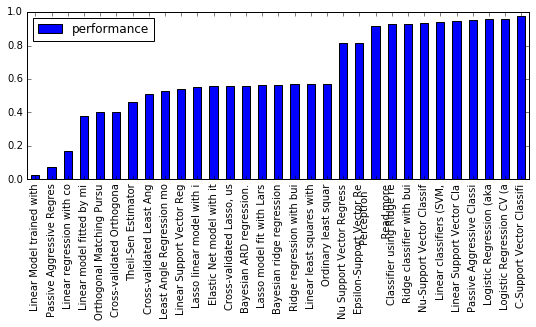

In [38]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(kind='bar', rot=90, ax=axes)

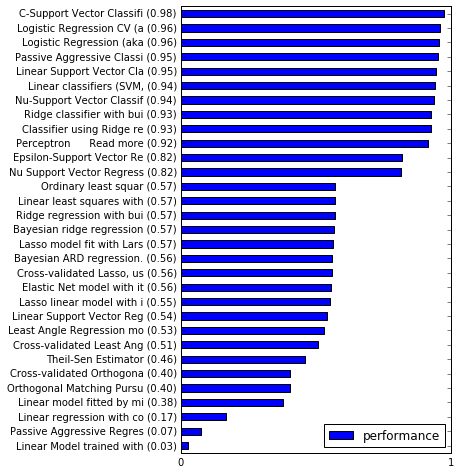

In [39]:
new_labels = []
for i, index in enumerate(df.index):
    new_label = "%s (%.2f)"%(index,df.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df.sort_values(col_name).plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass